## Test notebook for Data Management Acceptance Test Campaign 1
This test will be executed on the Rubin Science Platform Notebook Aspect at the Interim Data Facility, initialized with Science Pipelines release w_2022_32.

### Test case LVV-T90: Verify implementation of Dark Current Correction Frame

Verify that the DMS can produce a dark correction frame calibration product.

In [1]:
from lsst.daf.butler import Butler

import matplotlib.pyplot as plt
import numpy as np
import os
import lsst.afw.display as afwDisplay
from lsst.ip.isr import IsrTask
import lsst.obs.lsst as obs_lsst

#### Instantiate the Butler pointing to some HSC data:

In [2]:
repo = '/sdf/group/rubin/repo/main'
collection = 'HSC/runs/RC2/w_2022_28/DM-35609'
butler = Butler(repo, collections=collection)

#### Select a DataId for a single visit, and retrieve the raw and dark frame

In [3]:
dataId = {'instrument': 'HSC', 'detector': 42, 'visit': 30482, 'exposure':30482, 'band':'i'}

In [4]:
raw = butler.get('raw', dataId=dataId)
dark = butler.get('dark', dataId=dataId)

#### Set up plotting defaults:

In [7]:
# Use lsst.afw.display with the matplotlib backend
afwDisplay.setDefaultBackend('matplotlib')

# Set up some plotting defaults:

params = {'axes.labelsize': 28,
          'font.size': 24,
          'legend.fontsize': 14,
          'xtick.major.width': 3,
          'xtick.minor.width': 2,
          'xtick.major.size': 12,
          'xtick.minor.size': 6,
          'xtick.direction': 'in',
          'xtick.top': True,
          'lines.linewidth': 3,
          'axes.linewidth': 3,
          'axes.labelweight': 3,
          'axes.titleweight': 3,
          'ytick.major.width': 3,
          'ytick.minor.width': 2,
          'ytick.major.size': 12,
          'ytick.minor.size': 6,
          'ytick.direction': 'in',
          'ytick.right': True,
          'figure.figsize': [7, 7],
          'figure.facecolor': 'White'
          }

plt.rcParams.update(params)

#### Plot the dark frame image:

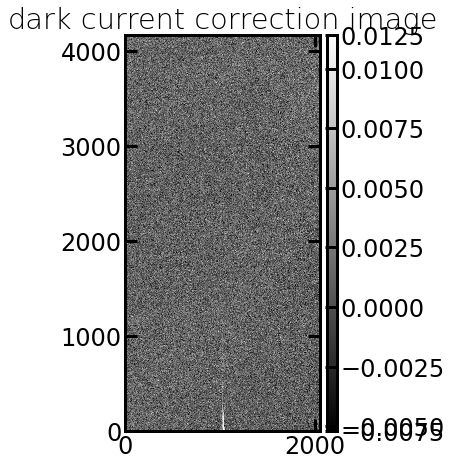

In [8]:
fig, ax = plt.subplots(1, 1)

display0 = afwDisplay.Display(frame=fig)
display0.scale("linear", "zscale")
display0.mtv(dark.image)
plt.title("dark current correction image")

plt.tight_layout()
plt.show()

That looks like a well-formed dark current frame, with some small column-like features at the bottom center.